In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Spam SMS Classification /spam.csv',encoding = 'latin-1') 

**Exploratory Data Analysis (EDA)**

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Dropping the unnecessary columns

df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [5]:
df.rename(columns = {'v1' : 'label', 'v2':'message'}, inplace = True)

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df.dtypes

label      object
message    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

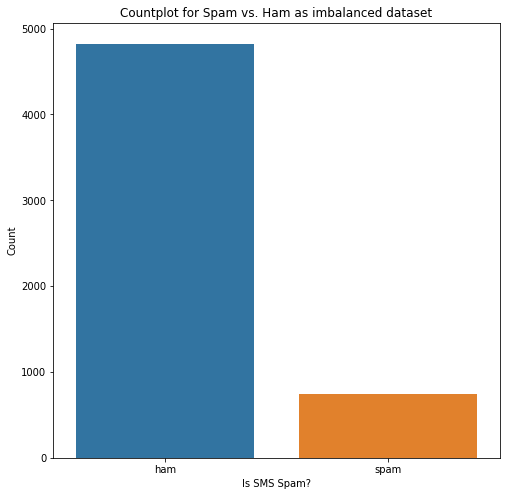

In [13]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

From the above countplot, it is evident that the dataset is imbalanced.

In [14]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [15]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Feature Engineering

In [16]:
# Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [17]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


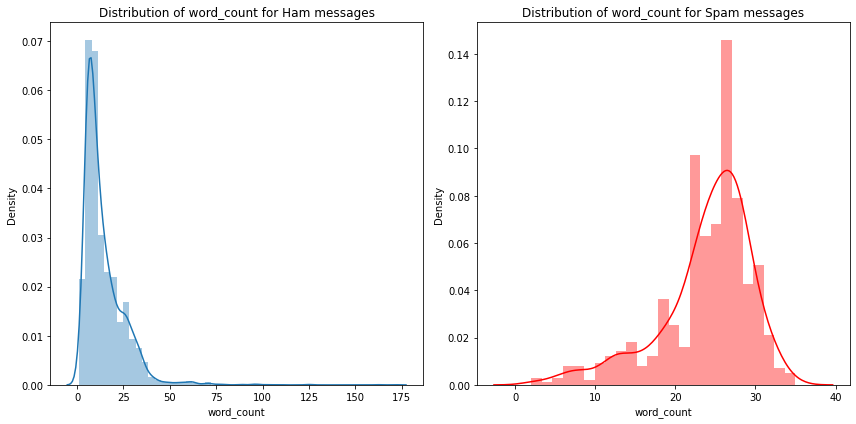

In [18]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

Spam messages wordcount fall in the range of 20-30 words, whereas majority of the Ham messages fall in the range of below 25 words.

**Data Cleaning**

In [19]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [21]:
corpus = []

for i in range(0, len(df)):

    # Cleaning special character from the sms
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])

    # Converting the entire sms into lower case
    review = review.lower()

     # Tokenizing the sms by words
    review = review.split()
    
    # Removing the stop words
    filtered_words = [word for word in review if not word in stopwords.words('english')]

    # stemming the words
    stemmed_words = [ps.stem(word) for word in filtered_words]

    # Joining the stemmed words
    review = ' '.join(stemmed_words)

    # Building a corpus of messages
    corpus.append(review)

In [22]:
corpus[0:3]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli']

In [23]:
df['corpus'] = corpus

In [24]:
df.head()

,label,message,word_count,corpus
0,0,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,nah think goe usf live around though


In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['label'], test_size = 0.20, random_state = 0)

In [26]:
X_train.tail()

4931                              match start india lt gt
3264    want new nokia colour phone deliveredtomorrow ...
1653    bugi juz wat walk home oredi late repli oso sa...
2607                      yeah lol luckili star role like
2732           dare stupid wont tell anyth hear wont talk
Name: corpus, dtype: object

In [27]:
y_train.tail()

4931    0
3264    1
1653    0
2607    0
2732    0
Name: label, dtype: int64

In [28]:
len(X_train)

4457

In [29]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary = True)
training_data = cv.fit_transform(X_train).toarray()
testing_data = cv.transform(X_test).toarray()

In [49]:
#Saving Bag of Words model
import pickle
# open a file, where you want to store the data
file = open('cv-transform.pkl', 'wb')

# dump information to that file
pickle.dump(cv, file)

Handling Imbalanced Dataset

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [31]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(training_data, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 3876, 1: 581})
The number of classes after fit Counter({0: 3876, 1: 3876})


**Model Building & Evaluation**

Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train_res, y_train_res)

In [33]:
#prediction
y_pred=spam_detect_model.predict(testing_data)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9739910313901345


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       952
           1       0.90      0.92      0.91       163

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.97      0.97      0.97      1115



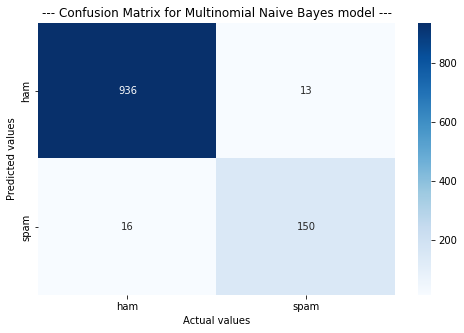

In [37]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues",xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

Random Forest

In [38]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
model = rf.fit(X_train_res, y_train_res)

In [39]:
#prediction
y_pred1 = model.predict(testing_data)

In [40]:
score=accuracy_score(y_test,y_pred1)
print(score)

0.9067264573991032


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       883
           1       0.89      0.63      0.74       232

    accuracy                           0.91      1115
   macro avg       0.90      0.81      0.84      1115
weighted avg       0.91      0.91      0.90      1115



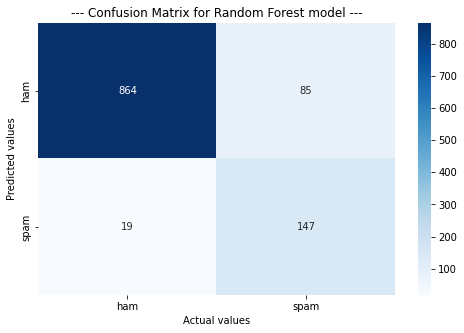

In [42]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

Naive Bayes algorithm is selected for predicting the results of this problem statement

Model Pickling

In [48]:
import pickle
# open a file, where you want to store the data
file = open('spam_classification.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

**Making Predictions**

In [43]:
def predict_spam(sample_message):
  sample_message = re.sub('[^a-zA-Z]', ' ', sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return spam_detect_model.predict(temp)

In [44]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [45]:
# Prediction 2 - Casual text chat
sample_message = 'I am doing good, will meet you tomorrow'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [46]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [47]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.
